In [1]:
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import os
from tqdm import tqdm

In [2]:
os.chdir('C:\\Users\\chandan.malla\\Desktop\\Data Science_chandan\\Applied AI notes\\NLP\\Amazon Fine Food reviews')
os.listdir()

['.ipynb_checkpoints',
 'BOW,TFIDF,W2V,AVGw2v, avg tfidif.ipynb',
 'database.sqlite',
 'final2.sqlite',
 'GoogleNews-vectors-ngative300.bin',
 'hashes.txt',
 'Pre-Proccessed_30000.sqlite',
 'Pre-Proccessed_Stemmed_30.sqlite',
 'Pre-Proccessed_Stemmed_30000.sqlite',
 'Pre-Processed_30000.sqlite',
 'Reviews.csv']

In [3]:
con = sqlite3.connect('./database.sqlite')
raw_data = pd.read_sql_query('select * from reviews',con)

In [4]:
temp = raw_data['Score']
temp = temp.map(lambda x:1 if x>3 else 0)
raw_data['Score'] = temp
raw_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
final = raw_data.drop_duplicates({'UserId','ProfileName', 'Time','Text'},keep = 'first' , inplace = False)

In [6]:
final = final[final['HelpfulnessNumerator']<=final['HelpfulnessDenominator']]

In [9]:
#######Sample only 30000 points
final = final.sample(n=3000,random_state=0).reset_index()

In [10]:
##### regular Expression https://pymotw.com/2/re
from bs4 import BeautifulSoup
import re
##Remove all http links
def remhttp(text): 
    text = re.sub(r'http\S+',' ',text) ##\S is all the non-whitespace character + - one or more
    return text

##Remove all html tags
def remhtml(text):
    soup = BeautifulSoup(text, 'lxml')
    text = soup.get_text()
    return text

##Remove all punct. or special characters
def remchar(text):
    text = re.sub(r'[^A-Za-z0-9\s]+',' ',text)
    return text

##Remove all words less than 3 letters
#def remles2letter(text):
 #   text = re.sub(r'\W*\b\w{1,3}\b',' ',text)
  #  return text
##convert to lower
def lower(text):
    text = text.lower()
    return text


def allconvert(text):
    return lower(remchar(remhtml(remhttp(text))))
final['Score'][1]

1

In [11]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#import nltk
#nltk.download('stopwords')                                     download stopwords

#stop = set(stopwords.words('english'))

##we can use set stopwords manually also.
stop= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])
sno = SnowballStemmer('english')
#stop = set(stopwords.words('english'))
print(stop)

{'through', 'only', 'wouldn', 'up', 'in', 'under', 'my', 'which', 'out', 'who', "that'll", 've', 'y', 'should', 'if', "doesn't", "hasn't", 'theirs', 'why', 'between', 'there', 'can', 'himself', 'do', "didn't", 'mightn', 'me', 'aren', 'didn', 'off', 'of', 'they', 'br', "needn't", 'we', 'as', 'its', 'all', 'has', 'had', 'these', 'hadn', 'shouldn', 'when', "won't", 'o', 'such', 'doesn', 'won', 't', 'yourself', 'then', 'same', 'm', "wouldn't", 'most', 'below', 'into', 'some', 'them', 'during', 'am', 'or', 'themselves', 'with', 's', 'too', 'isn', 'your', 'his', 'just', "hadn't", 'more', 'doing', 'herself', 'did', "isn't", 'that', 'a', "mightn't", 'couldn', "couldn't", 'weren', 'was', 'hasn', 'our', 'very', 'where', 'now', "you'd", 'the', 'are', 'by', 'after', "it's", 'needn', 'above', 'down', 'having', 'wasn', 'mustn', 'this', 'while', "wasn't", 'yours', 'is', 'their', "should've", 'ma', "you'll", 'and', "you're", 'those', 'been', 'each', 'him', 'd', 'over', 'it', 'own', "shan't", 'an', 'an

In [ ]:
###CODE to do actual Pre-Processing for ['Text']:

i=-1
all_positive_words=[]
all_negative_words=[]
final_text=[]
for text in final['Text']:
    i = i+1
    filtered_words=[]
    text = allconvert(text)
    for w in text.split():
        if (w not in stop):
            s =(sno.stem(w))
            filtered_words.append(s)
            if (final['Score'].values)[i]==1:
                all_positive_words.append(w)
            if (final['Score'].values)[i]==0:
                all_negative_words.append(w)
        else:
            continue
    str =' '.join(filtered_words)
    final_text.append(str)


                
    

In [13]:
final['Cleanedtext'] = final_text


In [14]:
sorted_data=final.sort_values('Time', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

# BOW

Here the fit method, when applied to the training dataset,learns the model parameters (for example, mean and standard deviation). We then need to apply the transform method on the training dataset to get the transformed (scaled) training dataset. We could also perform both of this steps in one step by applying fit_transform on the training dataset.

Then why do we need 2 separate methods - fit and transform ?

In practice we need to have a separate training and testing dataset and that is where having a separate fit and transform method helps. We apply fit on the training dataset and use the transform method on both - the training dataset and the test dataset. Thus the training as well as the test dataset are then transformed(scaled) using the model parameters that were learnt on applying the fit method the training dataset.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(sorted_data['Cleanedtext'],sorted_data['Score'],test_size=0.3,random_state=0)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(min_df=10, max_features=500,ngram_range=(1,3))

#Min_df When building the vocabulary ignore terms that
##have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. 
#Max_features : If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.


train_bow = count_vect.fit_transform(x_train)
test_bow = count_vect.transform(x_test)
#CV_bow = count_vect.transform(x_cv)

TFIDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_count_vect = TfidfVectorizer(min_df=10, max_features=500,ngram_range=(1,2))
train_tfidf = tfidf_count_vect.fit_transform(x_train)
test_tfidf = tfidf_count_vect.transform(x_test)
#CV_tfidf = tfidf_count_vect.transform(x_cv)

# Decision Tree for BOW

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [31]:
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [64]:
cv_acc=[]
tr_acc = []
depth = [3,4,5,6,7,8,9,10]
split = [2,10,30,50,60,70,80,90]
for i in depth:
    for j in split:
        clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=i, min_samples_split=j,
                                     min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_features=None)
        clf.fit(train_bow,y_train)
        scores = cross_val_score(clf,train_bow,y_train,cv=10,scoring='accuracy')
        cv_acc.append(scores.mean())
        pred_tr = clf.predict(train_bow)
        acc_tr =  accuracy_score(y_train,pred_tr,normalize = 100) * 100
        tr_error = 1 - acc_tr/100
        tr_acc.append(tr_error)

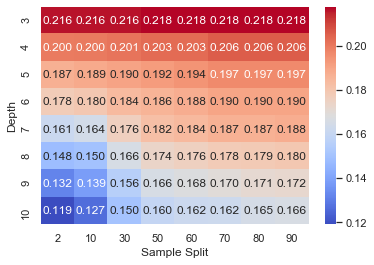

In [65]:
tr_acc = np.array(tr_acc)
tr_acc = tr_acc.reshape(len(split),len(depth))
sns.heatmap(tr_acc,annot=True, cmap='coolwarm', fmt=".3f", xticklabels=split,yticklabels=depth)
plt.xlabel('Sample Split')
plt.ylabel('Depth')
plt.show()

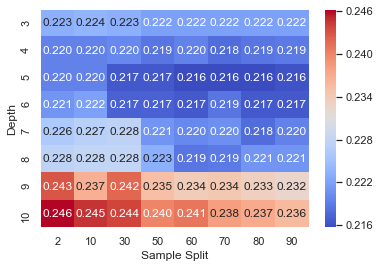

In [66]:
one_array = np.ones(len(cv_acc))
cv_err = list(one_array-cv_acc)
cv_err = np.array(cv_err)
cv_err = cv_err.reshape(len(split),len(depth))
sns.heatmap(cv_err,annot=True, cmap='coolwarm', fmt=".3f", xticklabels=split,yticklabels=depth)
plt.xlabel('Sample Split')
plt.ylabel('Depth')
plt.show()

In [83]:
## TRAINING at optimal Alpha and Depth
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=9, min_samples_split=100,
                                     min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_features=None)
clf.fit(train_bow,y_train)
pred_test = clf.predict(test_bow)
probabilities = clf.predict_proba(test_bow)
acc_test = accuracy_score(y_test,pred_test,normalize = 100) * 100
print('Test Accuracy for depth=9 and split = 200 ')
print(acc_test)

Test Accuracy for depth=9 and split = 200 
78.0


In [84]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score

fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])

print ("\n Classification report : \n",classification_report(y_test,pred_test))
conf_matrix = confusion_matrix(y_test,pred_test)
model_roc_auc = roc_auc_score(y_test,pred_test)
print ("Area under curve : ",model_roc_auc,"\n")


 Classification report : 
               precision    recall  f1-score   support

           0       0.48      0.24      0.32       194
           1       0.82      0.93      0.87       706

    accuracy                           0.78       900
   macro avg       0.65      0.59      0.60       900
weighted avg       0.74      0.78      0.75       900

Area under curve :  0.585015040448585 



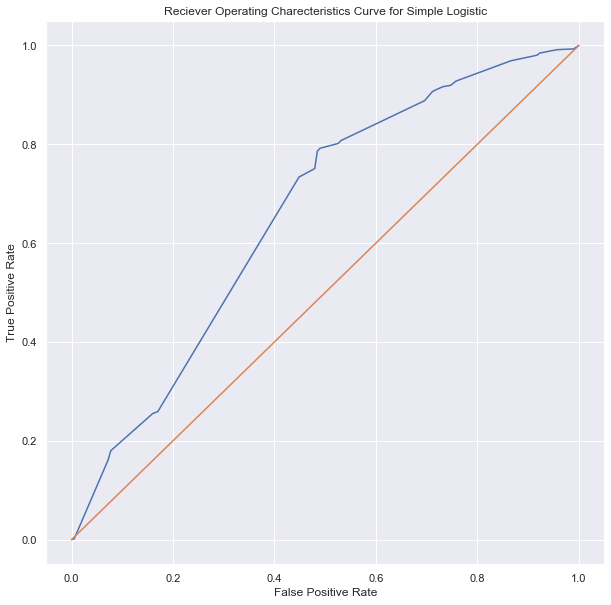

In [85]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(fpr,tpr)
ax.plot([0,1],[0,1])
ax.set_title('Reciever Operating Charecteristics Curve for Simple Logistic')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.show()

In [92]:
from sklearn import tree
from graphviz import Source
feat = count_vect.get_feature_names() 

In [95]:
feat = count_vect.get_feature_names() 
Source(tree.export_graphviz(clf, out_file = 'dsfds.png', feature_names = feat,max_depth=2))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH